In [7]:
import warnings
warnings.simplefilter('ignore')
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves,  compare_classifiers_performance_from_pred
from ludwig.utils.data_utils import load_json
import pandas as pd
import os
import os.path

## Prepare test data set for use

In [2]:
# create test dataframe
test_data = {'image_path': [], 'label': []}
current_dir = os.getcwd()
test_dir = os.path.join(current_dir, 'data', 'mnist_png', 'testing')
for label in os.listdir(test_dir):
    files = os.listdir(os.path.join(test_dir, label))
    test_data['image_path'] += [os.path.join(test_dir, label, f) for f in files]
    test_data['label'] += len(files) * [label]

# collect data into a data frame
test_df = pd.DataFrame(test_data)
print(test_df.head())

                                          image_path label
0  /opt/project/examples/mnist/data/mnist_png/tes...     9
1  /opt/project/examples/mnist/data/mnist_png/tes...     9
2  /opt/project/examples/mnist/data/mnist_png/tes...     9
3  /opt/project/examples/mnist/data/mnist_png/tes...     9
4  /opt/project/examples/mnist/data/mnist_png/tes...     9


## Assess the different neural network archictectures with the test data set

In [61]:
# get list of models to visualize results
models_list = ['Option1', 'Option2', 'Option3']
test_stats_list = []
preds_list = []

for m in models_list:
    # retrieve a trained model
    model = LudwigModel.load('./results/multiple_experiment_'+ m + '/model')

    # make predictions
    pred_df, test_stats = model.test(data_df=test_df)
    
    # collect test statsitics
    preds_list.append(pred_df['label_predictions'])
    test_stats_list.append(test_stats)


INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option1/model/model_weights
INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option2/model/model_weights
INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option3/model/model_weights


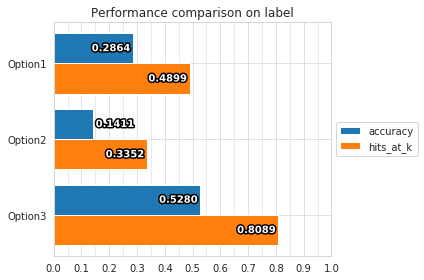

In [62]:
compare_performance(
  test_stats_list,
  'label',
  model_names=models_list,
  output_directory='./viz2',
  file_format='png'
)

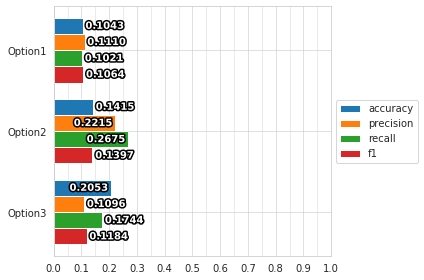

In [82]:
train_json = load_json('./results/multiple_experiment_Option1/model/train_set_metadata.json')
compare_classifiers_performance_from_pred(
  preds_list,
  test_df['label'].to_numpy().astype('int'),
  train_json,
  'label',
  4,
  model_names=models_list,
  output_directory='./viz2',
  file_format='png'
)